In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

ratData = pd.read_csv("rats_50.csv")
ratData.to_csv("ratData.csv")
ratData = pd.read_csv("ratData.csv")
ratData

,Unnamed: 0,Date reported,Generation,Group,Subgroup,Number of errors,Special training
0,0,1935,1,Trained,Trained,32,0
1,1,1935,1,Trained,Trained,50,0
2,2,1935,1,Trained,Trained,58,0
3,3,1935,1,Trained,Trained,70,0
4,4,1935,1,Trained,Trained,151,1
...,...,...,...,...,...,...,...
4606,4606,1954,50,Control,Control B,31,0
4607,4607,1954,50,Control,Control B,31,0
4608,4608,1954,50,Control,Control B,32,0
4609,4609,1954,50,Control,Control B,33,0


In [2]:

totalInGeneration = ratData.groupby("Generation", as_index = False).count()
# totalInGeneration = totalInGeneration["Date reported"].rename({"Date reported": "Counts"})
totalInGeneration = totalInGeneration[["Generation", "Unnamed: 0"]]
totalInGeneration = totalInGeneration.rename(columns={"Unnamed: 0": "Counts"})
totalInGeneration

,Generation,Counts
0,1,5
1,2,22
2,3,49
3,4,42
4,5,42
5,6,44
6,7,64
7,8,57
8,9,59
9,10,50


In [3]:
def colour_code(row):
    if (1 <= ratData['Generation'] <= 9):
        colour = 'green'
    elif (10 <= ratData['Generation'] <= 19):
        colour = 'yellow'
    elif (20 <= ratData['Generation'] <= 29):
        colour = 'orange'
    elif (30 <= ratData['Generation'] <= 39):
        colour = 'red'
    elif (40 <= ratData['Generation'] <= 50):
        colour = 'purple'
    return colour

Generation = ['1 to 9', '10 to 19', '20 to 29', '30 to 39', '40 to 50']

In [4]:
generation = ratData["Generation"]
groupedRat = ratData.groupby("Generation", as_index = True).sum()
groupedRat = groupedRat[["Number of errors", "Special training"]]
groupedRat = groupedRat.reset_index()
groupedRat

,Generation,Number of errors,Special training
0,1,361,1
1,2,1110,2
2,3,3131,10
3,4,2308,3
4,5,2235,3
5,6,1811,4
6,7,2800,4
7,8,2659,7
8,9,2014,2
9,10,2370,3


Text(0.5, 1.0, 'Graph of Generations and Special Training Frequency')

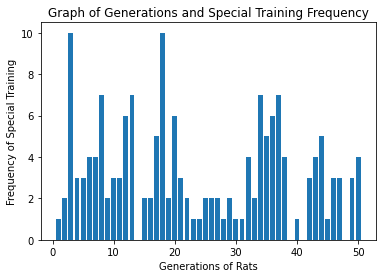

In [5]:
#groupedRat = groupedRat.reset_index()
plt.bar(groupedRat["Generation"], groupedRat["Special training"])
plt.xlabel("Generations of Rats")
plt.ylabel("Frequency of Special Training")
plt.title("Graph of Generations and Special Training Frequency")

Text(0, 0.5, 'Frequncy of Special Training')

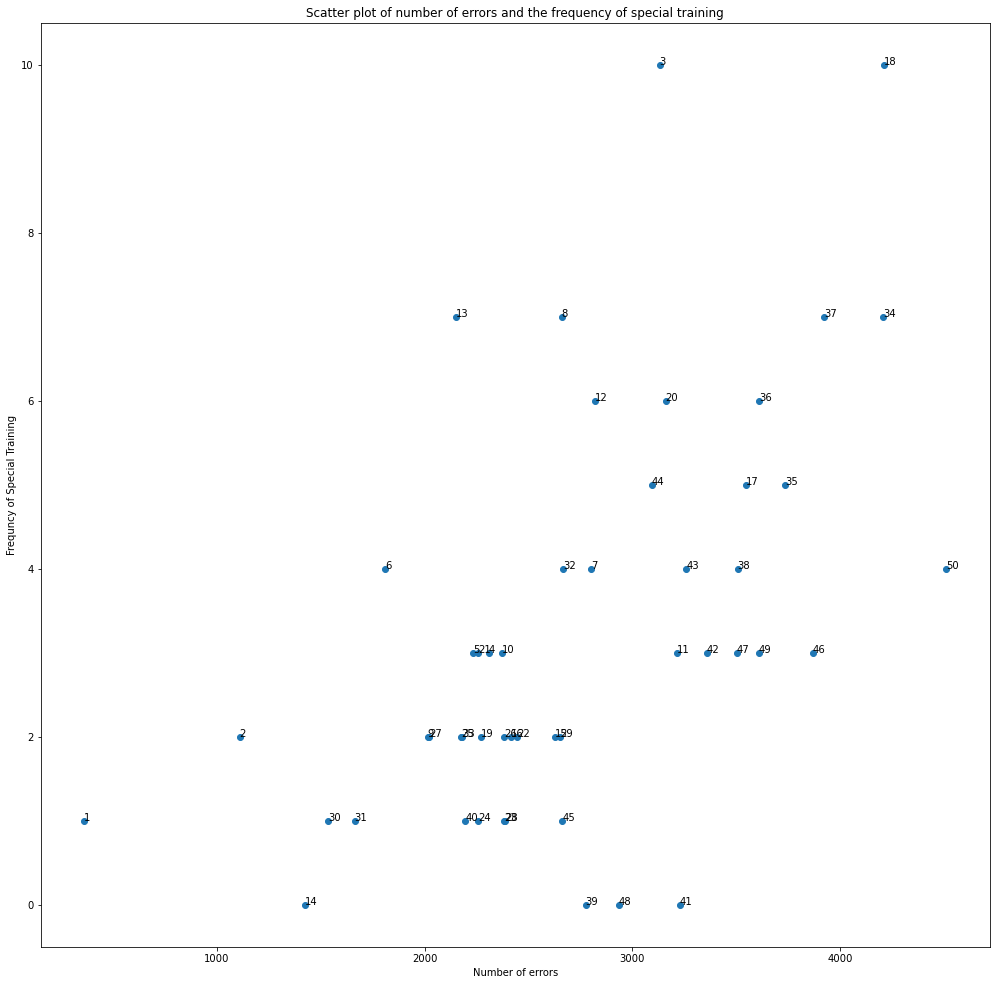

In [6]:


txt = [x for x in range(50)]
plt.scatter(groupedRat["Number of errors"], groupedRat["Special training"])

for i, txt in enumerate(groupedRat["Generation"]):
    plt.annotate(txt, (groupedRat["Number of errors"][i], groupedRat["Special training"][i]))
plt.gcf().set_size_inches((17, 17)) 
plt.title("Scatter plot of number of errors and the frequency of special training")
plt.xlabel("Number of errors")
plt.ylabel("Frequncy of Special Training")


In [7]:
noOfErrors = ratData[["Generation", "Number of errors"]]
noOfErrors.groupby("Generation").sum()

,Number of errors
Generation,
1,361
2,1110
3,3131
4,2308
5,2235
6,1811
7,2800
8,2659
9,2014


In [8]:
# Ratio of errors and rat counts

GenerationDf = groupedRat.merge(totalInGeneration, on = "Generation")
GenerationDf["ratio of rat counts and errors"] = GenerationDf["Number of errors"]/GenerationDf["Counts"]
GenerationDf["percentage of rat counts and special training"] = (GenerationDf["Special training"]/GenerationDf["Counts"])*100
GenerationDf.to_csv("GenerationAgg.csv")

Text(0, 0.5, 'Ratio of Rat counts and errors')

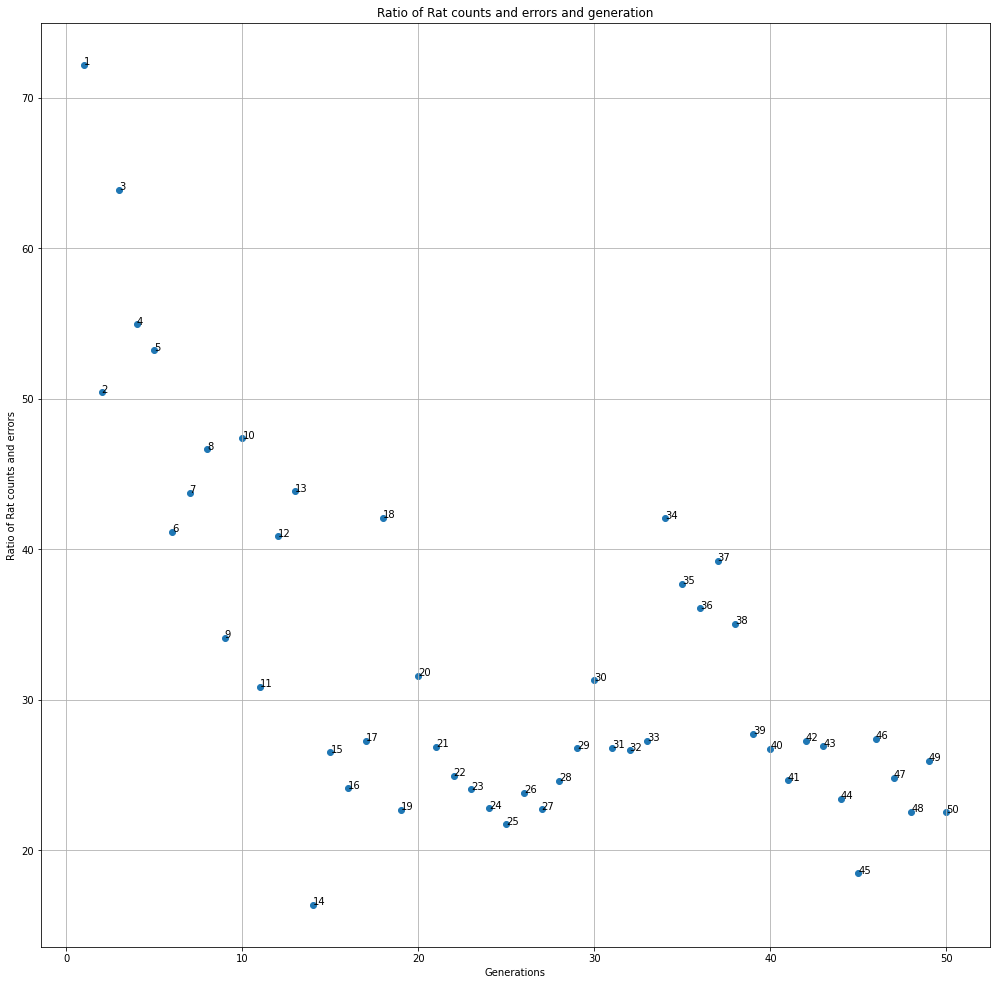

In [9]:
plt.grid()
plt.scatter(GenerationDf["Generation"],GenerationDf["ratio of rat counts and errors"])
for i, txt in enumerate(GenerationDf["Generation"]):
    plt.annotate(txt, (GenerationDf["Generation"][i], GenerationDf["ratio of rat counts and errors"][i]))
plt.gcf().set_size_inches((17, 17)) 
plt.title("Ratio of Rat counts and errors and generation")
plt.xlabel("Generations")
plt.ylabel("Ratio of Rat counts and errors")

Text(0, 0.5, 'Percentage of rat counts and special training')

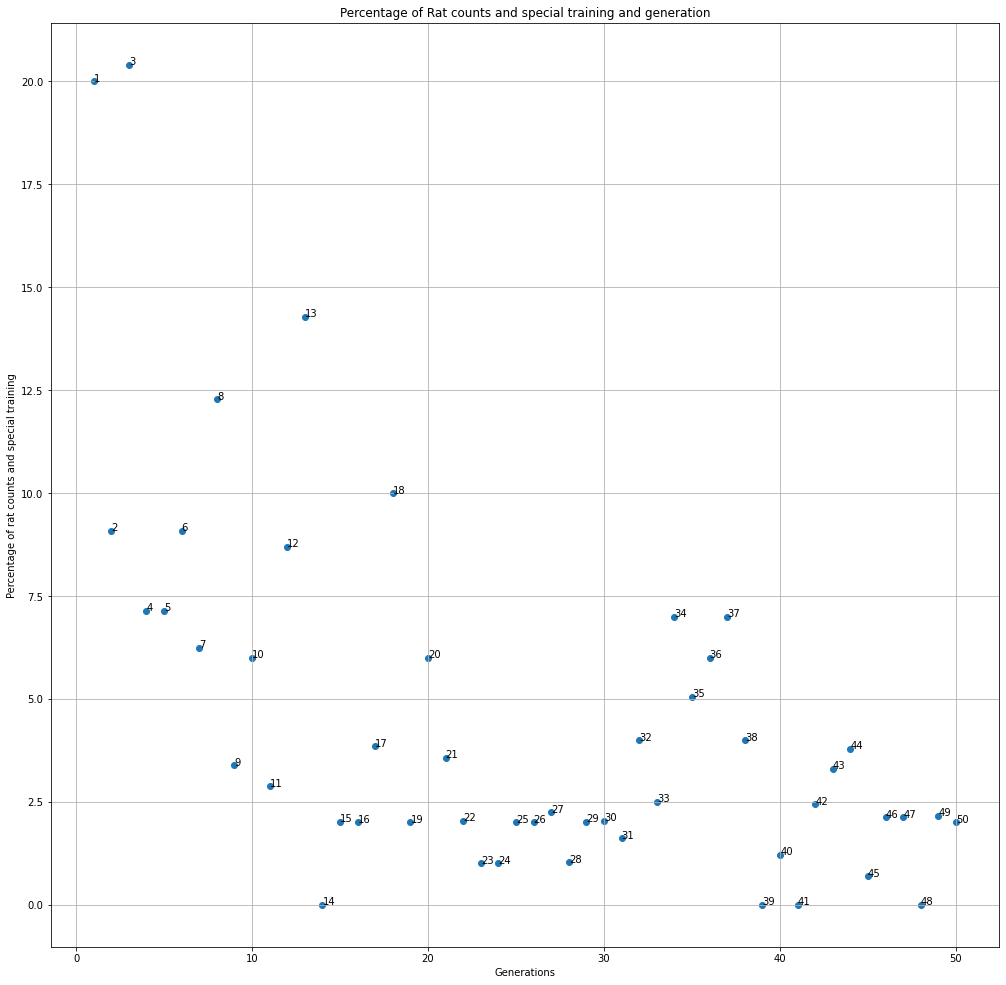

In [10]:
plt.grid()
plt.scatter(GenerationDf["Generation"],GenerationDf["percentage of rat counts and special training"])

for i, txt in enumerate(GenerationDf["Generation"]):
    plt.annotate(txt, (GenerationDf["Generation"][i], GenerationDf["percentage of rat counts and special training"][i]))
plt.gcf().set_size_inches((17, 17)) 
plt.title("Percentage of Rat counts and special training and generation")
plt.xlabel("Generations")
plt.ylabel("Percentage of rat counts and special training")


Equation of the regression line: y = -0.56x+47.62
0.45049147092549935


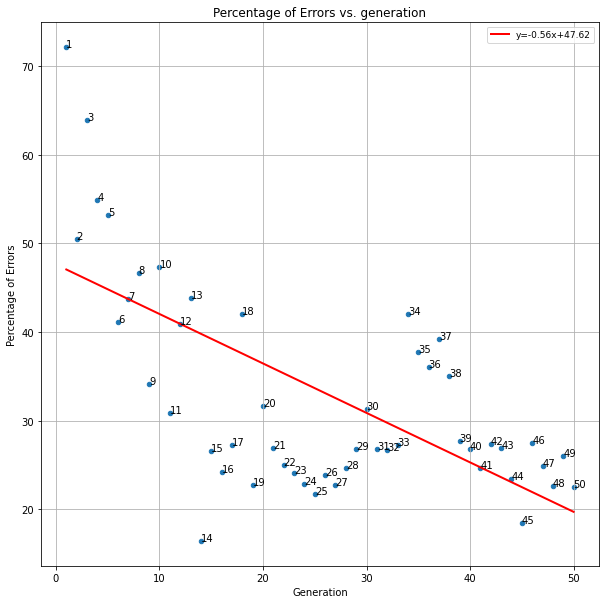

In [11]:
GenerationDf.corr()
generationdf = pd.DataFrame(GenerationDf["Generation"]) 
rat_ratio_err = pd.DataFrame(GenerationDf["ratio of rat counts and errors"])
dependent = rat_ratio_err
independent = generationdf

#Train test split

X_train,X_test, y_train, y_test= train_test_split(independent, dependent, train_size = 0.80, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
m = round(float(model.coef_),2)
c = round(float(model.intercept_),2)
print(f"Equation of the regression line: y = {m}x+{c}")
print(model.score(X_train,y_train)) # R^2 value score
GenerationDf.plot(kind='scatter', x='Generation', y='ratio of rat counts and errors')
for i, txt in enumerate(GenerationDf["Generation"]):
    plt.annotate(txt, (GenerationDf["Generation"][i], GenerationDf["ratio of rat counts and errors"][i]))
plt.plot(independent,model.predict(independent), color = 'red', linewidth = 2,label='y={:.2f}x+{:.2f}'.format(m,c))
plt.legend(fontsize=9)
plt.xlabel("Generation")
plt.ylabel('Percentage of Errors')
plt.title("Percentage of Errors vs. generation")
plt.grid(True)
plt.gcf().set_size_inches((10, 10))
# an R^2 value of 0.45 indicates a strong association between generation and errors per rat

Equation of the regression line: y = -0.19249500410440779x+9.64
0.3594814090764086


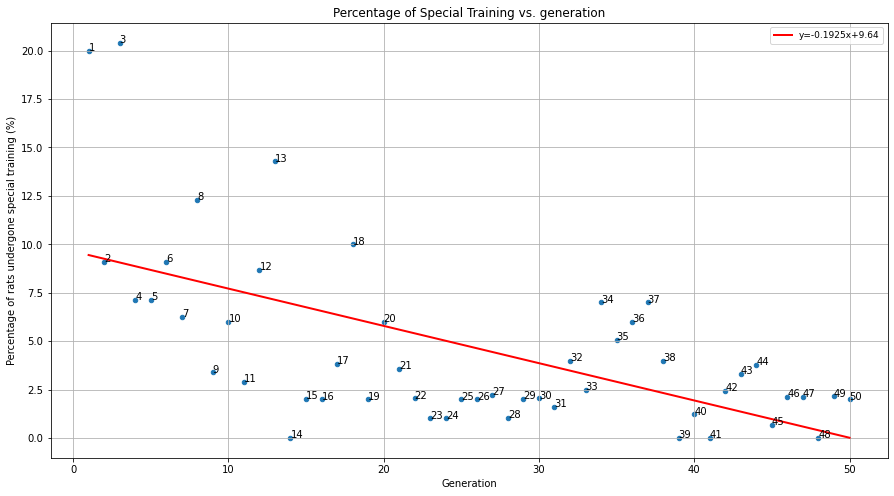

In [12]:
GenerationDf.corr()
# low_activity_test = ([35,30,25])
generationdf = pd.DataFrame(GenerationDf["Generation"]) 
rat_ratio_err = pd.DataFrame(GenerationDf["percentage of rat counts and special training"])
dependent = rat_ratio_err
independent = generationdf

#Train test split

X_train,X_test, y_train, y_test= train_test_split(independent, dependent, train_size = 0.80, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
m = float(model.coef_)
c = round(float(model.intercept_),2)
print(f"Equation of the regression line: y = {m}x+{c}")
print(model.score(X_train,y_train)) # R^2 value score
GenerationDf.plot(kind='scatter', x='Generation', y="percentage of rat counts and special training")
for i, txt in enumerate(GenerationDf["Generation"]):
    plt.annotate(txt, (GenerationDf["Generation"][i], GenerationDf["percentage of rat counts and special training"][i]))
plt.plot(independent,model.predict(independent), color = 'red', linewidth = 2,label='y={:.4f}x+{:.2f}'.format(m,c))
plt.legend(fontsize=9)
plt.xlabel("Generation")
plt.ylabel("Percentage of rats undergone special training (%)")
plt.title("Percentage of Special Training vs. generation")
plt.grid(True)
plt.gcf().set_size_inches((15, 8))
## R^2 value of 0.35 indicates strong effect of generations on percentage of special training


In [13]:

subGroupCounts = ratData.groupby("Subgroup").count().reset_index()
subGroupCounts = subGroupCounts.rename(columns={"Unnamed: 0": "Counts"})
subGroupCounts = subGroupCounts[["Subgroup", "Counts"]]
subGroupCounts

,Subgroup,Counts
0,Control,1582
1,Control A,362
2,Control B,307
3,Trained,1627
4,Trained A,366
5,Trained B,367


In [14]:
subGroupData = ratData.groupby("Subgroup").sum().reset_index()
subGroupData = subGroupData[["Subgroup", "Number of errors", "Special training"]]
subGroupData = subGroupData.merge(subGroupCounts, on = "Subgroup")
subGroupData



,Subgroup,Number of errors,Special training,Counts
0,Control,53092,79,1582
1,Control A,9498,10,362
2,Control B,7610,6,307
3,Trained,48499,57,1627
4,Trained A,8141,5,366
5,Trained B,8774,5,367


In [21]:
ratDataTrained = ratData.loc[ratData["Group"]=="Trained"].reset_index()
ratDataTrained.to_csv("Trained.csv")
ratDataControl = ratData.loc[ratData["Group"]=="Control"].reset_index()
ratDataControl.to_csv("Control.csv")


In [34]:
TrainedCounts = ratDataTrained.groupby("Generation", as_index = True).count().reset_index()
groupedRatTrained = ratDataTrained.groupby("Generation", as_index = True).sum().reset_index()



In [54]:
TrainedDf = TrainedCounts[["Generation", "Unnamed: 0"]].rename(columns = {"Unnamed: 0": "Counts"}).merge(groupedRatTrained, on = "Generation")
TrainedDf = TrainedDf[["Generation", "Counts", "Number of errors", "Special training"]]
TrainedDf["Percentage of Special Training"] = (TrainedDf["Special training"]/TrainedDf["Counts"])*100
TrainedDf["Average errors per rat"]=(TrainedDf["Number of errors"]/TrainedDf["Counts"])
TrainedDf.to_csv("Trained.csv")
TrainedDf


,Generation,Counts,Number of errors,Special training,Percentage of Special Training,Average errors per rat
0,1,5,361,1,20.000000,72.200000
1,2,15,856,2,13.333333,57.066667
2,3,25,1323,2,8.000000,52.920000
3,4,19,1085,2,10.526316,57.105263
4,5,22,1302,2,9.090909,59.181818
5,6,22,1097,3,13.636364,49.863636
6,7,31,1411,3,9.677419,45.516129
7,8,41,2176,6,14.634146,53.073171
8,9,12,203,0,0.000000,16.916667
9,10,13,397,0,0.000000,30.538462


In [45]:
ControlCounts = ratDataControl.groupby("Generation", as_index = True).count().reset_index()
groupedRatControl = ratDataControl.groupby("Generation", as_index = True).sum().reset_index()

In [55]:
ControlDf = ControlCounts[["Generation", "Unnamed: 0"]].rename(columns = {"Unnamed: 0": "Counts"}).merge(groupedRatControl, on = "Generation")
ControlDf = ControlDf[["Generation", "Counts", "Number of errors", "Special training"]]
ControlDf["Percentage of Special Training"] = (ControlDf["Special training"]/ControlDf["Counts"])*100
ControlDf["Average errors per rat"]=(ControlDf["Number of errors"]/ControlDf["Counts"])
ControlDf.to_csv("Control.csv")
